# Titanic Survival Predictor
Following the prompt of the Kaggle Competition: https://www.kaggle.com/c/titanic/overview

## Introduction
The purpose of this program is to create a model that predicts which passengers of the sinking of the Titanic survived or did not survive
based on passenger information.

## Data Requirements
Dataset of Titanic passengers with the following details:  
  * Survived (0 = No, 1 = Yes)  
  * Ticket class (1st, 2nd, or 3rd)
  * Sex
  * Age
  * Passenger fare
  * Cabin number
  * Number of siblings / spouses
  * Number of parents / children
  * Port of Embarkation
  * Ticket number

## Preliminary Assumptions
In order to assist in designing the prediction model, the following theories were made:  
  1. Holders of higher class tickets may have received priority treatment for lifeboats
  2. Sex will likely be a strong factor according to the well-known principle: "women and children first"
  3. Age will likely be a strong factor for the same reason
  4. Passenger Fares most likely do not have a strong influence on survival rate
  5. Certain cabins were closer to lifeboats, which would have increased the survival chances of these passengers
  6. A high number of siblings / spouses as well as parents / children would likely reduce likelihood of survival as one would expect
  these passengers would have attempted to find each other in the chaos before boarding a lifeboat  
  7. Port of Embarkation may play a role as passengers who boarded the Titanic earlier in its route may have become more familiar
  with the layout of the ship than those who embarked more recently 
  8. Connection between ticket number and survival is far less clear  
      a. Perhaps lower ticket numbers indicates early purchasers  
      b. If so, early purchasers may have been more knowledgeable of the ship and its journey  
      c. Alternatively, these early enthusiasts may have been overly-trusting of the ships structural integrity

## Methodology
1. Data Processing
  1. Input data from excel file
  2. Handle missing data by dropping or filling in by extrapolation
2. Data Analysis
  1. Generalizing data  
    *  Grouping titles
    *  Grouping ages
    *  Grouping fares
3. Modeling Data  
  * Logistic Regression
  * k-Nearest Neighbors
  * Support Vector Machines
  * Gaussian Naive Bayes
  * Decision Tree
  * Random Forest
  * Perceptron
  * Gradient Boosting Classifier
  
## Discussion
Throughout the processing and analysis of the data, my preliminary assumptions were confirmed or modified in the following ways:  
  1. Holders of first class tickets did have significantly higher survival rates than their counterparts
  2. Women had significantly higher survival rates than men
  3. Children generally much better while the older passengers did not
    *  Grouping ages improved model performances
  4. Higher passenger fares also resulted in higher survival rates
    * Grouping fares improved model performances
  5. Cabins were not able to be considered due to the number of missing values
  6. Number of siblings, spouses, parents, and children were combined into one classifier ('Group Size'), and proved to be major factor in determining survival
  7. Port of Embarkation analysis revealed that passengers who departed from Southhampton, which was the first port of departure, had the lowest survival rate, which directly counters my original theory
    *  Possible explanation is that passengers from Southampton may have been larger enthusiasts of the ship and may have been less urgent during the evacuation as a result of their their misplaced trust in the "Unsinkable Ship" 
  8. Ticket number appeared to be random and non-value adding and was, therefore, dropped from consideration

## Conclusion
The model that ended up performing best for Kaggle submissions was the Random Forest Classifier model with a 79.90% accuracy rate, placing in the top top 10.659%.

Title and Sex were the most important features of the Random Forest model.

---
---

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #statistical data visualization
import os
%matplotlib inline

### Data Processing

#### Extracting the Data

In [109]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("train.csv has {} records and {} columns.\n".format(train.shape[0],train.shape[1]))
print("test.csv has {} records and {} columns.\n".format(test.shape[0],test.shape[1]))
train.head(30)

train.csv has 891 records and 12 columns.

test.csv has 418 records and 11 columns.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [110]:
# It would seem that, contrary to my preliminatry hope, Passenger ID and Ticket Number likely do not have any meaningful values
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

#### Handling Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64


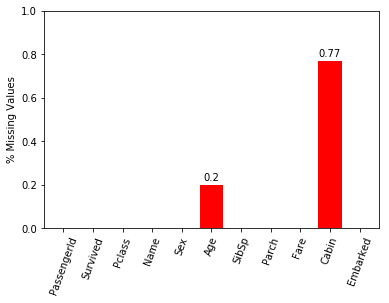

In [111]:
# Calculate which variables are missing values
NaN_ratio = round(train.isna().sum()/train.shape[0],2)

ax = plt.subplots(figsize=(6,4))

ax = NaN_ratio.plot(kind='bar', color='red', width=.8)
ax.set_ylabel('% Missing Values')
ax.set_xticklabels(train.columns, rotation = 70)
ax.set_ylim(0,1)

rects = ax.patches

for rect, label in zip(rects, NaN_ratio):
    if label != 0.0:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + .01, label, 
            ha='center', va='bottom', color='black')
 
print(train.isna().sum())

In [112]:
# Unfortunately, there are too many missing cabin numbers to include in the model
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

In [113]:
# With only two records missing Embarked values, I will drop those two records
for df in (train, test):
    df = df[df['Embarked'].notna()]
    df = df.reset_index()
    df = df.drop(['index'], axis=1)

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Miss.,Mrs.,Mr.,Master.,Dr.
count,146.000000,112.000000,511.000000,36.000000,9.000000
mean,21.773973,35.642857,33.118395,4.574167,39.444444
std,12.990292,11.506251,12.525001,3.619872,10.272671
min,0.750000,14.000000,11.000000,0.420000,23.000000
25%,14.125000,27.000000,24.000000,1.000000,33.000000
50%,21.000000,35.000000,31.000000,3.500000,36.000000
75%,30.000000,44.000000,40.000000,8.000000,49.000000
max,63.000000,63.000000,80.000000,12.000000,54.000000


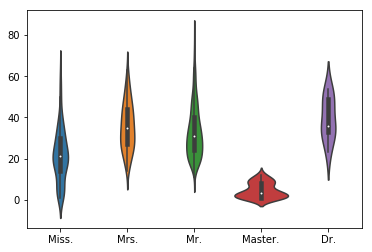

In [114]:
# As for the missing ages, there are too many to simply drop these records
# Further analysis where grouping by naming convention seems promising:

# Miss.
age_Miss = train['Age'][(train['Age'].notnull()) & (train['Name'].str.contains('Miss.'))]

# Mrs.
age_Mrs = train['Age'][(train['Age'].notnull()) & (train['Name'].str.contains('Mrs.'))]

# Mr.
age_Mr = train['Age'][(train['Age'].notnull()) & (train['Name'].str.contains('Mr.'))]

# Master
age_Master = train['Age'][(train['Age'].notnull()) & (train['Name'].str.contains('Master.'))]

# Dr.
age_Dr = train['Age'][(train['Age'].notnull()) & (train['Name'].str.contains('Dr.'))]

# Plot to check distributions
df_ages = pd.DataFrame({'Miss.':age_Miss, 'Mrs.': age_Mrs, 'Mr.': age_Mr, 'Master.': age_Master, 'Dr.': age_Dr})
sns.violinplot(data=df_ages, orient='v')

df_ages.describe()

Since the average and median are relatively close across the board and the interquartile ranges aren't unreasonable, I will fill in missing ages based on the average age of the group to which their title corresponds.

In [115]:
# Making the title within the name official
train['Title'] = train['Name'].str.extract(' ([\w]+\.)', expand=False)
test['Title'] = test['Name'].str.extract(' ([\w]+\.)', expand=False)

# Taking a closer look at the titles
print(pd.value_counts(train['Title']),'\n')

# Some titles occur only a handful of times and probably should be combined with their more common counterparts
for df in (train, test):
    df['Title'].replace('Mlle.','Miss.', inplace=True)
    df['Title'].replace('Ms.','Miss.', inplace=True)
    df['Title'].replace('Mme.','Mrs.', inplace=True)
    df['Title'].replace('Sir.','Mr.', inplace=True)
    df['Title'].replace(['Dr.','Rev.','Col.','Major.','Countess.','Don.','Jonkheer.','Capt.','Lady.'],'Special', inplace=True)

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Sir.           1
Mme.           1
Ms.            1
Countess.      1
Don.           1
Jonkheer.      1
Capt.          1
Lady.          1
Name: Title, dtype: int64 



In [116]:
# Fill in missing ages with average age, grouped by title
for df in (train, test):
    # Dictionary of average age for each title
    avgAge_dict = {}
    for t in df['Title'].unique():
        avgAge_dict[t] = df['Age'][df['Title'] == t].mean()

    # Fill in missing values based on title
    for index,row in df.iterrows():
        if np.isnan(row['Age']):
            df.loc[index,'Age'] = avgAge_dict[row['Title']]

In [117]:
# Reviewing titles
print(pd.value_counts(train['Title']))

Mr.        518
Miss.      185
Mrs.       126
Master.     40
Special     22
Name: Title, dtype: int64


In [118]:
# Drop name as it is no longer necessary
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

### Exploratory Analysis

In [119]:
# Check that all missing values have been scrubbed
print(train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64


In [120]:
# Combine sibling/spouse and parent/child count
train['Group size'] = train['SibSp'] + train['Parch']
test['Group size'] = test['SibSp'] + test['Parch']

In [121]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Group size
0,1,0,3,male,22.000000,1,0,7.2500,S,Mr.,1
1,2,1,1,female,38.000000,1,0,71.2833,C,Mrs.,1
2,3,1,3,female,26.000000,0,0,7.9250,S,Miss.,0
3,4,1,1,female,35.000000,1,0,53.1000,S,Mrs.,1
4,5,0,3,male,35.000000,0,0,8.0500,S,Mr.,0
5,6,0,3,male,32.409774,0,0,8.4583,Q,Mr.,0
6,7,0,1,male,54.000000,0,0,51.8625,S,Mr.,0
7,8,0,3,male,2.000000,3,1,21.0750,S,Master.,4
8,9,1,3,female,27.000000,0,2,11.1333,S,Mrs.,2
9,10,1,2,female,14.000000,1,0,30.0708,C,Mrs.,1


##### Categorical Data

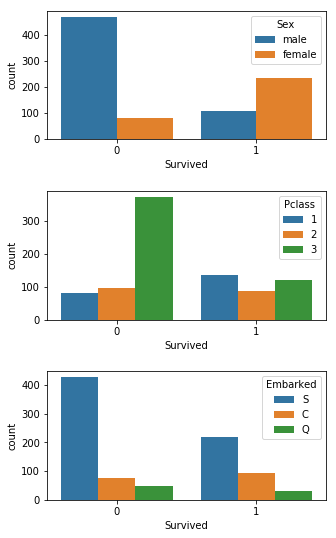

In [122]:
plt.subplots(figsize=(5,9))
plt.subplot(3, 1, 1)
sns.countplot(x='Survived', hue='Sex', data=train)
plt.subplot(3, 1, 2)
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.subplot(3, 1, 3)
sns.countplot(x='Survived', hue='Embarked', data=train)

plt.subplots_adjust(hspace=0.4)

##### Observations (Categorical Data)
* Most men did not survive  
* Women had a much higher chance of survival


* Most 3rd class ticket holders did not survive
* Chances of survival was about 50/50 for 2nd class ticket holders
* 1st class ticket holders had a slightly higher chance of survival


* Between the three ports of embarkation, those who embarked from Southampton faired the worst, which disproves my preliminary assumption
  * Perhaps the cultural differences between British, French, and Irish citizens at that time could provide additional insight

In [123]:
# Calculate significant survival rates
print(train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean(), '\n')
print(train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean(), '\n')
print(train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean(), '\n')
print(train[['Title','Survived']].groupby(['Title'], as_index=False).mean(), '\n')

      Sex  Survived
0  female  0.742038
1    male  0.188908 

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 

     Title  Survived
0  Master.  0.575000
1    Miss.  0.702703
2      Mr.  0.158301
3     Mrs.  0.793651
4  Special  0.318182 



##### Quantitative Data

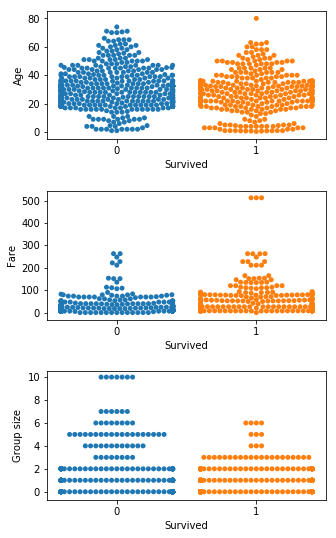

In [124]:
plt.subplots(figsize=(5,9))
plt.subplot(3, 1, 1)
sns.swarmplot(x='Survived', y='Age', data=train)
plt.subplot(3, 1, 2)
sns.swarmplot(x='Survived', y='Fare', data=train)
plt.subplot(3, 1, 3)
sns.swarmplot(x='Survived', y='Group size', data=train)

plt.subplots_adjust(hspace=0.4)

##### Observations (Quantitative Data)
* There doesn't appear to be significant variances for survival rates when considering Age or Fare.  
* Larger groups (i.e. many siblings, spouses, parents, and/or children) performed worse.
* May make sense to bin Ages as well as Fares

In [125]:
# Binning Age
train['Age Bins'] = pd.cut(train['Age'],5)
print(train[['Age Bins','Survived']].groupby(['Age Bins'], as_index=False).mean(), '\n')

           Age Bins  Survived
0    (0.34, 16.336]  0.548077
1  (16.336, 32.252]  0.392670
2  (32.252, 48.168]  0.320000
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909 



In [126]:
# Binning Fare
train['Fare Bins'] = pd.cut(train['Fare'],4)
print(train[['Fare Bins','Survived']].groupby(['Fare Bins'], as_index=False).mean(), '\n')

            Fare Bins  Survived
0   (-0.512, 128.082]  0.368113
1  (128.082, 256.165]  0.724138
2  (256.165, 384.247]  0.666667
3  (384.247, 512.329]  1.000000 



### Convert Categorical Data to Numerical

In [127]:
for df in (train, test):
    for index, row in df.iterrows():
        if row['Sex'] == 'female': df.loc[index,'Sex'] = 0
        elif row['Sex'] == 'male': df.loc[index,'Sex'] = 1
        else: df.loc[index, 'Sex'] = 2

        if row['Embarked'] == 'S': df.loc[index,'Embarked'] = 0
        elif row['Embarked'] == 'C': df.loc[index,'Embarked'] = 1
        elif row['Embarked'] == 'Q': df.loc[index,'Embarked'] = 2
        else: df.loc[index,'Embarked'] = 3

        if row['Title'] == 'Mr.': df.loc[index,'Title'] = 0
        elif row['Title'] == 'Miss.': df.loc[index,'Title'] = 1
        elif row['Title'] == 'Mrs.': df.loc[index,'Title'] = 2
        elif row['Title'] == 'Master.': df.loc[index,'Title'] = 3
        elif row['Title'] == 'Special': df.loc[index,'Title'] = 4
        else: df.loc[index,'Title'] = 4

        if row['Age'] <= 16.336: df.loc[index, 'Age'] = 0
        elif row['Age'] <= 32.252: df.loc[index, 'Age'] = 1
        elif row['Age'] <= 48.168: df.loc[index, 'Age'] = 2
        elif row['Age'] <= 64.084: df.loc[index, 'Age'] = 3
        elif row['Age'] <= 80.0: df.loc[index, 'Age'] = 4
        else: df.loc[index,'Age'] = 4

        if row['Fare'] <= 128.082: df.loc[index, 'Fare'] = 0
        elif row['Fare'] <= 256.165: df.loc[index, 'Fare'] = 1
        elif row['Fare'] <= 384.247: df.loc[index, 'Fare'] = 2
        elif row['Fare'] <= 512.329: df.loc[index, 'Fare'] = 3
        else: df.loc[index,'Fare'] = 4

In [128]:
# Age Bins and Fare Bins are no longer needed
train.drop(['Age Bins','Fare Bins'], axis=1, inplace=True)

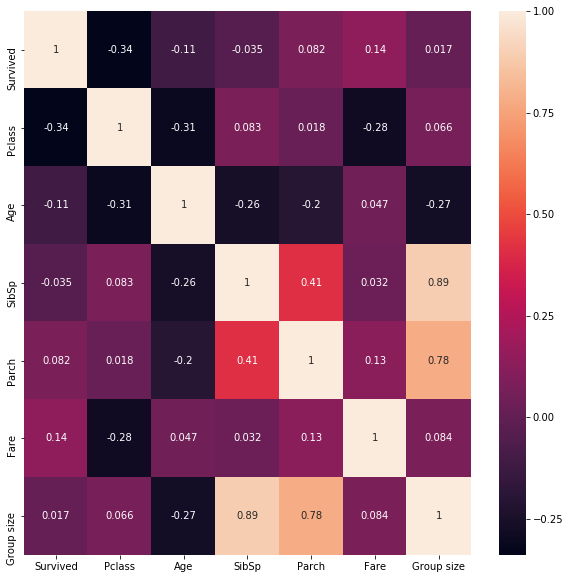

In [129]:
# Investigate correlation matrix
plt.subplots(figsize=(10,10))
ax = sns.heatmap(train[['Survived','Pclass','Age','SibSp','Parch','Fare','Group size']].corr(),annot=True)

In [130]:
# High correlation between Sibling/Spouse count and Parent/Children count with Group Size, which makes sense
# As such, best to drop these two to avoid multicollinearity issues
train.drop(['SibSp','Parch'], axis=1, inplace=True)
test.drop(['SibSp','Parch'], axis=1, inplace=True)

### Modeling

For a Supervised Learning, Classification and Regression problem such as this, the following models will be tested:
1. Logistic Regression
2. k-Nearest Neighbors
3. Support Vector Machines
4. Gaussian Naive Bayes
5. Decision Tree
6. Random Forest
7. Perceptron
8. Gradient Boosting Classifier


In [131]:
# Split training data (80%-20%)
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = train.drop(['Survived','PassengerId'], axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


#### Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

# Train model
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, y_train)

# Evaluate
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, LR.predict(X_test)))

Train set Accuracy:  0.7921348314606742
Test set Accuracy:  0.7541899441340782


#### k-Nearest Neighbors

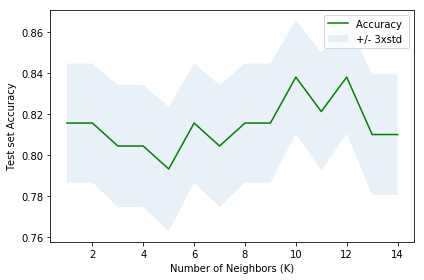

In [133]:
from sklearn.neighbors import KNeighborsClassifier

# Test out different number of k neighbors
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n,).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    #Evaluate
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
# Plot to see which k performed best
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Test set Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [134]:
# Looks like 10 neighbors performed best
neigh = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neigh.predict(X_test)))

Train set Accuracy:  0.8286516853932584
Test set Accuracy:  0.8379888268156425


#### Support Vector Machines

In [135]:
from sklearn.svm import SVC

# Train model
svc = SVC()
svc.fit(X_train, y_train)

# Evaluate
print("Train set Accuracy: ", metrics.accuracy_score(y_train, svc.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, svc.predict(X_test)))

Train set Accuracy:  0.8426966292134831
Test set Accuracy:  0.8156424581005587


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Gaussian Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

# Train model
NB = GaussianNB()
NB.fit(X_train, y_train)

# Evaluate
print("Train set Accuracy: ", metrics.accuracy_score(y_train, NB.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, NB.predict(X_test)))

Train set Accuracy:  0.8216292134831461
Test set Accuracy:  0.7821229050279329


#### Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

# Train model
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Evaluate
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DT.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DT.predict(X_test)))

Train set Accuracy:  0.8693820224719101
Test set Accuracy:  0.8268156424581006


#### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Find the best parameters
RF_tester = RandomForestClassifier()
param_grid = { 'criterion': ['gini', 'entropy'], 
              'min_samples_leaf': [1, 5, 10, 15], 
              'min_samples_split': [2, 4, 6, 10], 
              'n_estimators': [50, 100, 200, 400],
              'max_features':['auto', 'sqrt'],
              'oob_score': [True],
              'random_state': [1]
             }

gs = GridSearchCV(estimator=RF_tester, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.827247191011236
{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True, 'random_state': 1}


In [103]:
# Train model
RF = RandomForestClassifier(criterion='gini', 
                             n_estimators=50,
                             min_samples_leaf=10,
                             min_samples_split=2,
                             max_features='auto',
                             oob_score=True,
                             random_state=1)
RF.fit(X_train, y_train)

# Evaluate
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RF.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, RF.predict(X_test)))

Train set Accuracy:  0.8356741573033708
Test set Accuracy:  0.7932960893854749


#### Perceptron

In [104]:
from sklearn.linear_model import Perceptron

# Train model
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, y_train)

# Evaluate
print("Train set Accuracy: ", metrics.accuracy_score(y_train, perceptron.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, perceptron.predict(X_test)))

Train set Accuracy:  0.8075842696629213
Test set Accuracy:  0.7877094972067039


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


#### Gradient Boosting Classifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)

# Evaluate
print("Train set Accuracy: ", metrics.accuracy_score(y_train, perceptron.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, gbk.predict(X_test)))

Train set Accuracy:  0.8075842696629213
Test set Accuracy:  0.8100558659217877


### Submission to Kaggle

In [106]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = RF.predict(test.drop(['PassengerId'], axis=1))
submission.to_csv('RF.csv', index=False)

In [107]:
# Showcase Random Forest features, sorted by importance
pd.concat((pd.DataFrame(X_train.columns, columns = ['Feature']), 
           pd.DataFrame(RF.feature_importances_, columns = ['Importance'])), 
          axis = 1).sort_values(by='Importance', ascending = False)

,Feature,Importance
7,Title,0.410006
1,Sex,0.237712
0,Pclass,0.142203
8,Group size,0.078983
3,SibSp,0.041350
2,Age,0.035847
6,Embarked,0.029097
4,Parch,0.021726
5,Fare,0.003077


Submission Result: 79.90%
Leaderboard: top 10.659%

### Random Forest Features Analysis